線形回帰

線形回帰スクラッチ

In [118]:
# PandasのDataFrame型のtrain_dataに格納
import pandas as pd
import numpy as np

train_data=pd.read_csv("/Users/chidayasuhiro/diveintocode-ml/train.csv")

In [119]:
# Pandasからndarrayへ変更

X =train_data.loc[:,['GrLivArea','YearBuilt']]
y =train_data.loc[:,"SalePrice"]
Xandy=pd.concat([X,y],axis=1)

X_np=np.array(X)
y_np=np.array(y)

In [206]:
# 分割
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X_np,y_np)

train_y=train_y.reshape(len(train_y),1)
test_y=test_y.reshape(len(test_y),1)

完成した雛形

In [283]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        # 学習過程を記録する配列を用意
        self.verbose_list=[]
        self.verbose_list_val=[]
        
    def _gradient_descent(self,X,y,i):
        
        a1=X@self.param-y
        a2=X.T@a1
        a3=self.param-(self.lr*a2)/len(X)
        self.param=a3
        self.verbose_list.append(self.param)
        
        y_pred=X@a3
        e_sum=0
        for j in range(len(y_pred)):
            e_sum += (y_pred[j]-y[j])**2
        loss=e_sum/2*len(y_pred)
        self.loss[i]=loss
        self.coef=self.param
        
    def _gradient_descent_val(self,X_val,y_val,i):
        
        a1=X_val@self.param-y_val
        a2=X_val.T@a1
        a3=self.param-(self.lr*a2)/len(X_val)
        self.param=a3
        self.verbose_list_val.append(self.param)
        
        y_pred=X_val@a3
        e_sum=0
        for j in range(len(y_pred)):
            e_sum += (y_pred[j]-y_val[j])**2
        loss=e_sum/2*len(y_pred)
        self.val_loss[i]=loss
        self.coef_val=self.param
            
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples,1)
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples,1)
            検証データの正解値
        """
        #　定数項を作成
        if self.no_bias==False:
            X_bias=np.ones(len(X))
            X=np.insert(X,0,X_bias,axis=1)
            
            
        #　初期値　０で設定
        param=np.zeros(X.shape[1])
        self.param=param.reshape(len(param),1)
        
        for i in range(self.iter):
            self._gradient_descent(X,y,i)
            
        #verboseをTrueにした際は学習過程を出力   
        if self.verbose:
            print(self.verbose_list)
            
        # X_valとy_valが入った時の処理     
        if X_val is None:
            pass
        else:
            #　定数項を作成
            if self.no_bias==False:
                X_bias=np.ones(len(X_val))
                X_val=np.insert(X_val,0,X_bias,axis=1)


            #　初期値　０で設定
            param=np.zeros(X_val.shape[1])
            self.param=param.reshape(len(param),1)

            for i in range(self.iter):
                self._gradient_descent_val(X_val,y_val,i)

            #verboseをTrueにした際は学習過程を出力   
            if self.verbose:
                print(self.verbose_list_val)
                               
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
        y_pred  :  次の形のndarray, shape (n_samples,)
            線形回帰による推定結果
        """
        if not(X.shape[1]==len(self.coef)):            
            X_bias=np.ones(len(X))
            X1=np.insert(X,0,X_bias,axis=1)
        y_pred=X1@self.coef            
        return y_pred

In [290]:
# 実装例
from sklearn.metrics import mean_absolute_error
SLR5=ScratchLinearRegression(num_iter=1,lr=0.0000001,no_bias=False,verbose=False)
SLR5.fit(train_X,train_y,X_val=None, y_val=None)
SLR5.predict(train_X)
y_pred=SLR5.predict(train_X)
mean_absolute_error(train_y, y_pred)

67602.59723880712

In [292]:
SLR5.loss

array([5.16217759e+15])

In [291]:
SLR5.coef

array([[1.77909382e-02],
       [2.94722896e+01],
       [3.51794030e+01]])

【問題1】仮定関数

In [212]:
# パラメータベクトルは仮でnp.arangeで作成する,そこに本来はパラメータの推定量が入る

def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    Returns
    -------
    y :次の形のndarray, shape (n_samples, 1)
       線形の仮定関数による推定結果
    """
    theta=np.arange(1,len(X)+1)
    theta=theta.reshape(len(X),1)
    y=x@theta

    return y

【問題2】最急降下法・・・雛形の_gradient_descentで制作

【問題3】推定・・・雛形のpredictで制作

【問題4】平均二乗誤差・・・雛形の_gradient_descentの中でMSEを計算

In [220]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    e_sum=0
    for i in range(len(y_pred)):
        e_sum += (y_pred[i]-y[i])**2
    
    mse=e_sum/len(y_pred)
    
    return mse

【問題5】目的関数・・・雛形の_gradient_descentの中のlossで計算

【問題6】学習と推定　値は割と近いようには見える

In [264]:
# sklearnによる実行をし比較

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

reg = LinearRegression()
reg.fit(train_X,train_y)
y_pred=reg.predict(test_X)
mean_absolute_error(test_y, y_pred)

31947.075737565603

【問題7】学習曲線のプロット

In [221]:
SLR3=ScratchLinearRegression(num_iter=10,lr=0.0000001,no_bias=False,verbose=False)
SLR3.fit(train_X,train_y,test_X,test_y)

In [222]:
SLR3.loss

array([5.16217759e+15, 2.68400706e+15, 2.31947246e+15, 2.25497516e+15,
       2.23342386e+15, 2.21836242e+15, 2.20461014e+15, 2.19142006e+15,
       2.17867406e+15, 2.16634361e+15])

In [223]:
SLR3.val_loss

array([6.22220622e+14, 3.36967646e+14, 2.99237649e+14, 2.92538286e+14,
       2.89790093e+14, 2.87603733e+14, 2.85552904e+14, 2.83581975e+14,
       2.81681759e+14, 2.79848957e+14])

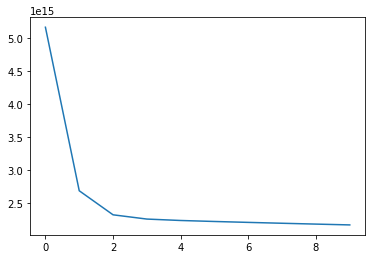

In [252]:
import matplotlib.pyplot as plt
plt.plot(SLR3.loss)

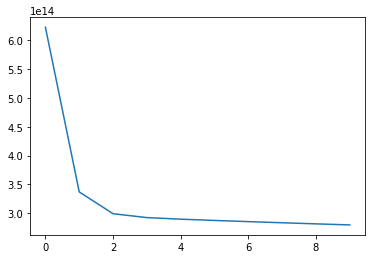

In [253]:
plt.plot(SLR3.val_loss)

【問題8】（アドバンス課題）バイアス項の除去

In [254]:
#　まずバイアスがない場合を見てみる

reg3 = LinearRegression(fit_intercept=False)
reg3.fit(train_X,train_y)
reg3.predict(test_X)

array([[139017.1224161 ],
       [242635.45230678],
       [228200.52974112],
       [198710.0919073 ],
       [178124.98397024],
       [113349.48248686],
       [178878.09324616],
       [239640.2737909 ],
       [149284.54343856],
       [203688.97676659],
       [277934.439419  ],
       [103523.2068265 ],
       [169468.98630679],
       [221179.3969187 ],
       [105369.50379706],
       [152055.65645697],
       [227292.97228109],
       [245641.43893674],
       [117561.33460756],
       [166654.81280562],
       [198747.99201107],
       [159839.6841542 ],
       [196923.35907166],
       [112717.81409073],
       [185339.2200162 ],
       [196278.78972806],
       [260075.07140765],
       [249916.45789705],
       [116027.26913038],
       [175205.87324144],
       [226167.04486167],
       [119504.82823726],
       [396452.54629899],
       [241483.99057197],
       [140230.19331623],
       [146963.07128638],
       [256913.34649883],
       [203383.19574695],
       [2021

推定を行うことは可能であるが、１つは定数項がないために評価の１つの尺度である決定係数の解釈に違いが出るため、決定係数は修正をした上で計算し解釈を行わなければならない。

【問題9】（アドバンス課題）特徴量の多次元化

In [261]:
# 特徴量を２乗する

train_XX=train_X*train_X
train_yy=train_y*train_y
test_XX=test_X*test_X
test_yy=test_y*test_y

In [260]:
reg4 = LinearRegression()
reg3.fit(train_XX,train_yy)
reg3.predict(test_XX)

array([[2.25855615e+10],
       [6.22081498e+10],
       [5.52020940e+10],
       [4.25344362e+10],
       [3.47607341e+10],
       [1.66343734e+10],
       [3.50639557e+10],
       [6.08326098e+10],
       [2.52610192e+10],
       [4.45251592e+10],
       [8.14539156e+10],
       [1.47415270e+10],
       [3.16636466e+10],
       [5.20766713e+10],
       [1.49523191e+10],
       [2.61967938e+10],
       [5.49107291e+10],
       [6.38364117e+10],
       [1.74390084e+10],
       [3.07193085e+10],
       [4.25580007e+10],
       [2.87404047e+10],
       [4.17455142e+10],
       [1.62530869e+10],
       [3.74031863e+10],
       [4.15747230e+10],
       [7.14047942e+10],
       [6.60176158e+10],
       [1.70733586e+10],
       [3.37826608e+10],
       [5.43877776e+10],
       [1.78988554e+10],
       [1.66729033e+11],
       [6.17356921e+10],
       [2.29721385e+10],
       [2.47393860e+10],
       [6.97129987e+10],
       [4.43786045e+10],
       [4.39322576e+10],
       [1.76257353e+10],


In [262]:
test_yy

array([[ 25600000000],
       [ 46010250000],
       [ 48400000000],
       [ 94249000000],
       [ 72900000000],
       [ 16129000000],
       [ 60800710084],
       [ 69169000000],
       [ 11004010000],
       [ 37830250000],
       [125316000000],
       [ 17689000000],
       [ 31152250000],
       [ 48400000000],
       [ 13225000000],
       [ 22500000000],
       [156025000000],
       [ 97969000000],
       [ 11882744064],
       [  8649000000],
       [101124000000],
       [ 31128250624],
       [ 18742979025],
       [  9980010000],
       [ 60025000000],
       [ 57600000000],
       [ 71824000000],
       [ 73929610000],
       [ 18225000000],
       [ 80044858084],
       [ 57503560401],
       [ 13806250000],
       [390625000000],
       [122500000000],
       [ 25600000000],
       [ 21904000000],
       [ 82369000000],
       [ 75625000000],
       [ 43056250000],
       [ 15625000000],
       [ 28224000000],
       [ 33819210000],
       [ 51529000000],
       [ 52

推定は行えるものの、推定結果の残差はより大きくなっているように見える